# Visualizing Data (brief overview)


### Loading Relevant Packages

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
from scipy.cluster import hierarchy
import weightedstats as ws
from scipy.stats import wilcoxon

### Central Tendency

Examining the percentage of delayed flights by the cause of delay using a barplot. Delays are categorized as being due to factors under carrier control, air traffic control (ATC) system delays, weather, security, or late inbound aircrafts.

In [12]:
dfw = pd.read_csv("../data_raw/eda_dfw_airline.csv")
dfw.columns

Index(['Carrier', 'ATC', 'Weather', 'Security', 'Inbound'], dtype='object')

In [13]:
dfw.iloc[0]

Carrier      64263.16
ATC          84856.50
Weather      11235.42
Security       343.15
Inbound     118427.82
Name: 0, dtype: float64

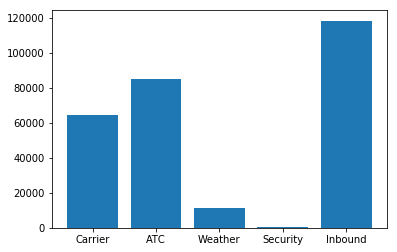

In [14]:
plt.bar([1,2,3,4,5], dfw.iloc[0])
plt.xticks([1,2,3,4,5], dfw.columns)
plt.show()

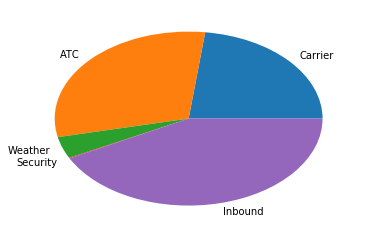

In [15]:
plt.pie(dfw.iloc[0], labels = dfw.columns)
plt.show()

### Data Distribution

In [16]:
state = pd.read_csv("../data_raw/eda_state.csv")
np.std(state.Population)

6779407.114632265

In [17]:
stats.iqr(state.Population)

4847308.0

In [18]:
state.Population.mad()

4450933.356000001

In [19]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Note that standard deviation is almost 1.5 times as large as the MAD. This is not surprising since the standard deviation is sensitive to outliers. There is quite a bit of variability: the 5th percentile is only 1.6 murders per 100,000 people and the 95th percentile is 6.51.

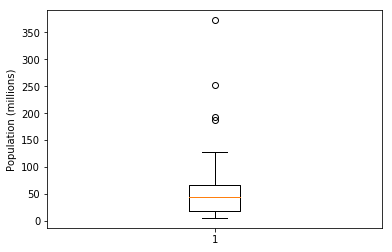

In [20]:
# Boxplot

plt.boxplot(state.Population/100000)
plt.ylabel("Population (millions)")
plt.show()

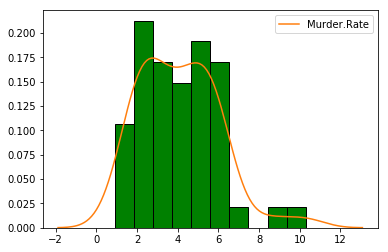

In [22]:
# Density plot (smoothed version of a histogram)

plt.hist(state['Murder.Rate'],
         facecolor='green',
         density=True,
         edgecolor='black')

fig=sns.kdeplot(state['Murder.Rate'], legend=True)
plt.show()

### Bivariate: Correlation and Scatterplot Matrices / Correlation Matrix

In [23]:
sp500 = pd.read_csv("../data_raw/eda_sp500_data.csv")
sp500.shape

(5647, 518)

In [24]:
sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [25]:
sp500=sp500[sp500['Unnamed: 0']>'2012-07-01']
sp500.shape

(754, 518)

In [26]:
symbols = ["T", "CTL", "FTR", "VZ", "LVLT"]
etfs=sp500[symbols]
etfs.shape

(754, 5)

In [27]:
corr = etfs.corr(method='pearson')
corr

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


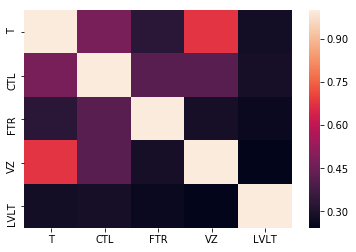

In [28]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

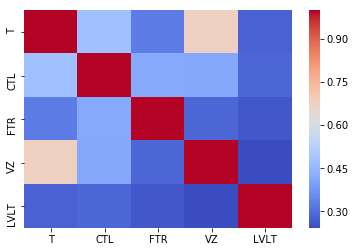

In [29]:
sns.heatmap(corr, 
            cmap='coolwarm')
plt.show()

In [30]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Telecommunication Stock Performance Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

,T,CTL,FTR,VZ,LVLT
T,1,0.47,0.33,0.68,0.28
CTL,0.47,1,0.42,0.42,0.29
FTR,0.33,0.42,1,0.29,0.26
VZ,0.68,0.42,0.29,1,0.24
LVLT,0.28,0.29,0.26,0.24,1


### Scatterplot Matrix for Predictor Variables

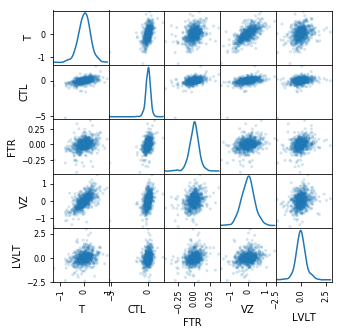

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(etfs, alpha=0.2, 
               figsize=(5, 5), 
               diagonal='kde')
plt.show()

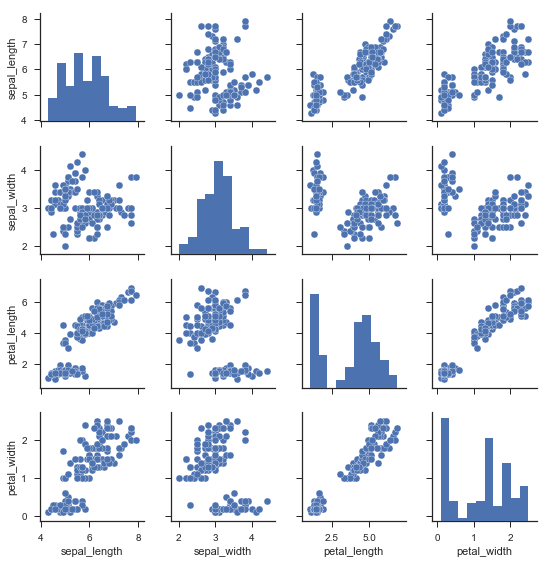

In [32]:
# import seaborn as sns
sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")
g = sns.pairplot(iris, 
                 size=2.0)

### Scatterplot Matrix for Predictor Variables and a Response Variable

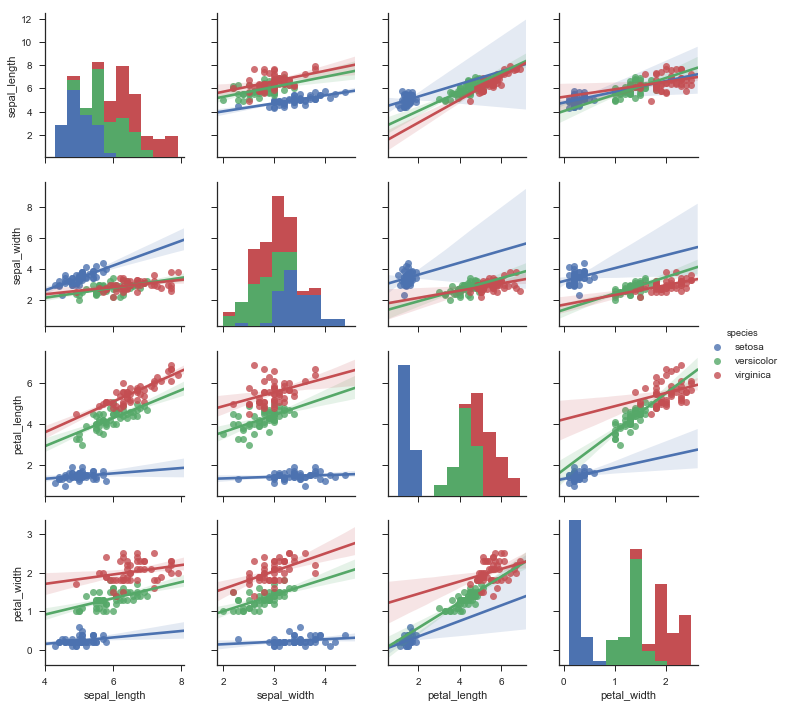

In [33]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

sns.pairplot(iris,
             diag_kind='hist',
             hue="species",
             kind="reg")
plt.show()

### Hexagonal Binning for Quantitative Variables

The Hexagonal binning plot addresses the issue that arises when scatterplots become too dense to visualize relationships as illustrated on the `kc_tax` data that contains values for residential properties in King County, Washington:

In [34]:
kc_tax=pd.read_csv("../data_raw/eda_kc_tax.csv")
kc_tax=kc_tax.query('TaxAssessedValue<750000 & SqFtTotLiving > 100 & SqFtTotLiving < 3500')
kc_tax.shape

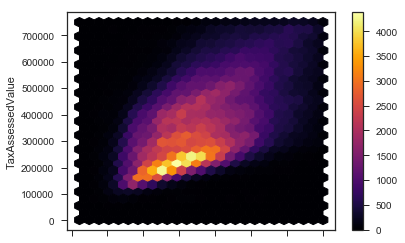

In [37]:
kc_tax.plot.hexbin(x='SqFtTotLiving', 
                   y='TaxAssessedValue',
                   gridsize = 25,
                   cmap='inferno')
plt.xlabel('Finished Square Feet')
plt.show()

### Correlation Plots

In [6]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df_corr_matrix = df.corr()
df_corr_matrix.head()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Correlation: Statistical Significance 

In [40]:
import seaborn as sns
df = sns.load_dataset("iris")

from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["petal_length"], 
                                       df["petal_width"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, 
      "\nand a P-value of:", p_value) 

Pearson Correlation Coefficient:  0.9628654314027961 
and a P-value of: 4.675003907327543e-86


### Bivariate: Comparing Quantitaive Variable against Categorical Variable

In [42]:
airlines= pd.read_csv("../data_raw/eda_airline_stats.csv")
airlines.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


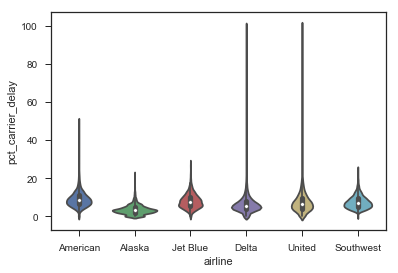

In [43]:
# Violin plot

sns.violinplot(x="airline", 
               y="pct_carrier_delay", 
               data=airlines)
plt.show()

### Multivariate: Visually Exploring Multiple Variables

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


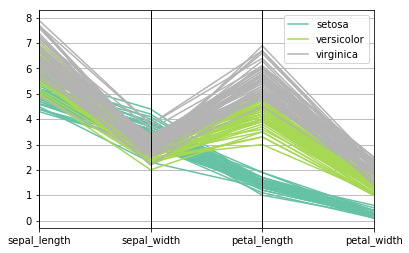

In [4]:
# Parallel coordinates plot

from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'species',
                    colormap=plt.get_cmap("Set2"))
plt.show()

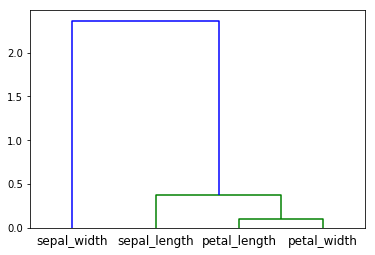

In [5]:
# Cluster Dendrogram

df = sns.load_dataset("iris")
data=df.corr()
Z = hierarchy.linkage(data, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z,labels=data.columns)